In [8]:
# import sys
# sys.path.append('..')

# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# from util.preprocessing import *
# from imblearn.over_sampling import SMOTE, RandomOverSampler
# from imblearn.under_sampling import OneSidedSelection, EditedNearestNeighbours
# import re
# from dateutil import parser


# def preprocess_data():
#     df = pd.read_csv('../data/output-v2.csv')
#     #필요 없는 특성 제거

#     allColumns = df.columns
#     params = ['발생일시','공공/민간 구분', '기상상태', '시설물 종류', '사망자수(명)', '부상자수(명)', '공사비', '공사기간', '공정률', '작업자수', '설계안전성검토', '공종']

#     df = df.drop(allColumns.drop(params), axis=1)

#     df = df.dropna()

#     df['공종'] = df['공종'].apply(extract_middle_class)

#     print(df['공종'].value_counts())

#     #범주형 데이터를 수치형 데이터로 인코딩

#     df['사망자수(명)'] = df['사망자수(명)'].apply(parse_num_of_people)
#     df['부상자수(명)'] = df['부상자수(명)'].apply(parse_num_of_people)
#     df['발생일시'] = df['발생일시'].apply(extract_month)
#     df['시설물 종류'] = df['시설물 종류'].apply(extract_facility)
#     df['공사기간'] = df['공사기간'].apply(count_days)
#     df['공정률'] = df['공정률'].apply(str_to_median)
#     df['작업자수'] = df['작업자수'].apply(extract_population)
#     df['공사비'] = df['공사비'].apply(extract_cost)
#     safety_ratio_by_job = calculate_safety_ratios(df)
#     safety_ratio_by_job = safety_ratio_by_job.drop(['공종별 안전사고 발생 비율', '공종별 사망자 비율', '공종별 부상자 비율', '공종별 안전사고 발생강도 비율', '공종별 안전사고 발생 건수', '공종별 사망자수', '공종별 부상자수'], axis=1)
#     df = pd.merge(df, safety_ratio_by_job, on='공종', how='inner')
#     df['피해규모'] = df.apply(calc_damage_scale, axis=1)

#     # 기상 상태 컬럼 분리
#     df[['날씨', '기온', '습도']] = df['기상상태'].str.extract('날씨 : (\S+)기온 : (\d+)℃습도 : (\d+)%')
#     df = df.drop(['기상상태'], axis=1)

#     df = df.dropna()

#     le = LabelEncoder()
#     df['설계안전성검토'] = le.fit_transform(df['설계안전성검토'])

#     # 시설물 종류 특성을 원-핫 인코딩

#     ct = ColumnTransformer([
#     ('onehot', OneHotEncoder(sparse=False), ['시설물 종류', '공공/민간 구분', '날씨', '공종'])], remainder='passthrough'
#     )
#     ct.fit(df)
#     X = ct.transform(df)
#     # 컬럼 이름 리스트 생성

#     num_cols = df.columns.tolist()
#     ohe = ct.named_transformers_['onehot']
#     ohe_cols = ohe.get_feature_names_out(['시설물 종류', '공공/민간 구분', '날씨', '공종']).tolist()
#     new_cols = ohe_cols + num_cols
#     new_cols.remove('시설물 종류')
#     new_cols.remove('공공/민간 구분')
#     new_cols.remove('날씨')
#     new_cols.remove('공종')
#     # DataFrame으로 변환

#     df = pd.DataFrame(X, columns=new_cols)

#     df = df.astype('float64')

#     df['습도'] = df['습도'].apply(lambda x: x/100)

#     # --------------------정제 완료 ----------------------------

#     X = df.drop(['사망자수(명)', '부상자수(명)', '피해규모', '공종별 위험도 평가지수'], axis=1)
#     y = df[['공종별 위험도 평가지수']]
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     return X_train, X_test, y_train, y_test

# preprocess_data()

import sys
sys.path.append('..')

import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from util.preprocessing import *
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import OneSidedSelection, EditedNearestNeighbours
import re
from dateutil import parser


def preprocess_data():
    df = pd.read_csv('../data/output-v2.csv')
    #필요 없는 특성 제거

    allColumns = df.columns
    params = ['발생일시','공공/민간 구분', '기상상태', '시설물 종류', '사망자수(명)', '부상자수(명)', '공사비', '공사기간', '공정률', '작업자수', '설계안전성검토', '공종']
    # params = ['발생일시','공공/민간 구분', '기상상태', '시설물 종류', '사망자수(명)', '부상자수(명)', '공사비', '공사기간', '공정률', '작업자수', '설계안전성검토']

    df = df.drop(allColumns.drop(params), axis=1)

    df = df.dropna()

    df['공종'] = df['공종'].apply(extract_middle_class)

    #범주형 데이터를 수치형 데이터로 인코딩

    df['사망자수(명)'] = df['사망자수(명)'].apply(parse_num_of_people)
    df['부상자수(명)'] = df['부상자수(명)'].apply(parse_num_of_people)
    df['발생일시'] = df['발생일시'].apply(extract_month)
    df['시설물 종류'] = df['시설물 종류'].apply(extract_facility)
    df['공사기간'] = df['공사기간'].apply(count_days)
    df['공정률'] = df['공정률'].apply(str_to_median)
    df['작업자수'] = df['작업자수'].apply(extract_population)
    df['공사비'] = df['공사비'].apply(extract_cost)
    safety_ratio_by_job = calculate_safety_ratios(df)
    safety_ratio_by_job = safety_ratio_by_job.drop(['공종별 안전사고 발생비율', '공종별 사망자 비율', '공종별 부상자 비율', '공종별 안전사고 발생강도 비율', '공종별 안전사고 발생 건수', '공종별 사망자수', '공종별 부상자수', '공종별 안전사고 발생비율 위험도', '공종별 안전사고 발생강도 위험도'], axis=1)
    df = pd.merge(df, safety_ratio_by_job, on='공종', how='inner')
    df['피해규모'] = df.apply(calc_damage_scale, axis=1)

    # 기상 상태 컬럼 분리
    df[['날씨', '기온', '습도']] = df['기상상태'].str.extract('날씨 : (\S+)기온 : (\d+)℃습도 : (\d+)%')
    df = df.drop(['기상상태'], axis=1)

    df = df.dropna()

    le = LabelEncoder()
    df['설계안전성검토'] = le.fit_transform(df['설계안전성검토'])

    df = df.drop(['공종'], axis = 1)
    # 시설물 종류 특성을 원-핫 인코딩

    # ct = ColumnTransformer([
    # ('onehot', OneHotEncoder(sparse=False), ['시설물 종류', '공공/민간 구분', '날씨', '공종'])], remainder='passthrough'
    # )
    ct = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse=False), ['시설물 종류', '공공/민간 구분', '날씨'])], remainder='passthrough'
    )
    ct.fit(df)
    X = ct.transform(df)
    # 컬럼 이름 리스트 생성

    num_cols = df.columns.tolist()
    ohe = ct.named_transformers_['onehot']
    # ohe_cols = ohe.get_feature_names_out(['시설물 종류', '공공/민간 구분', '날씨', '공종']).tolist()
    ohe_cols = ohe.get_feature_names_out(['시설물 종류', '공공/민간 구분', '날씨']).tolist()
    new_cols = ohe_cols + num_cols
    new_cols.remove('시설물 종류')
    new_cols.remove('공공/민간 구분')
    new_cols.remove('날씨')
    # new_cols.remove('공종')
    print(new_cols)

    # DataFrame으로 변환

    df = pd.DataFrame(X, columns=new_cols)

    df = df.astype('float64')

    df['습도'] = df['습도'].apply(lambda x: x/100)

    # --------------------정제 완료 ----------------------------

    # X = df.drop(['사망자수(명)', '부상자수(명)', '피해규모', '공종별 위험도 평가지수'], axis=1)
    X = df.drop(['사망자수(명)', '부상자수(명)', '피해규모'], axis=1)
    y = df[['공종별 위험도 평가지수']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

preprocess_data()

c:\Users\추효정\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['시설물 종류_건축 ', '시설물 종류_산업환경설비 ', '시설물 종류_조경 ', '시설물 종류_토목 ', '공공/민간 구분_공공', '공공/민간 구분_민간', '날씨_강설', '날씨_강우', '날씨_강풍', '날씨_맑음', '날씨_안개', '날씨_흐림', '발생일시', '사망자수(명)', '부상자수(명)', '공사비', '공사기간', '공정률', '작업자수', '설계안전성검토', '공종별 안전사고 발생비율 위험도', '공종별 안전사고 발생강도 위험도', '피해규모', '기온', '습도']


KeyError: "None of [Index(['공종별 위험도 평가지수'], dtype='object')] are in the [columns]"

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# 데이터 분리
X_train, X_test, y_train, y_test = preprocess_data()

# 모델 초기화
lr_model = LinearRegression()

# 모델 학습
lr_model.fit(X_train, y_train)

# 예측 수행
y_pred = lr_model.predict(X_test)

# 예측값과 실제값의 MSE 계산
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

['시설물 종류_건축 ', '시설물 종류_산업환경설비 ', '시설물 종류_조경 ', '시설물 종류_토목 ', '공공/민간 구분_공공', '공공/민간 구분_민간', '날씨_강설', '날씨_강우', '날씨_강풍', '날씨_맑음', '날씨_안개', '날씨_흐림', '발생일시', '사망자수(명)', '부상자수(명)', '공사비', '공사기간', '공정률', '작업자수', '설계안전성검토', '공종별 안전사고 발생비율 위험도', '공종별 안전사고 발생강도 위험도', '공종별 위험도 평가지수', '피해규모', '기온', '습도']
MSE: 1.1925918696757387e-27


c:\Users\추효정\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = preprocess_data()

# 선형 회귀 모델 학습 및 예측
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Linear Regression 학습 완료.")

# Ridge 회귀 모델 학습 및 예측
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge Regression 학습 완료.")

# Lasso 회귀 모델 학습 및 예측
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso Regression 학습 완료.")

# ElasticNet 회귀 모델 학습 및 예측
enet = ElasticNet(alpha=0.1, l1_ratio=0.7)
enet.fit(X_train, y_train)
enet_pred = enet.predict(X_test)
print("Enet Regression 학습 완료.")

# 결정 트리 회귀 모델 학습 및 예측
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Dicision Tree Regression 학습 완료.")

# 랜덤 포레스트 회귀 모델 학습 및 예측
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("RandomForest Regression 학습 완료.")

# SVM 회귀 모델 학습 및 예측
# svm = SVR(kernel='linear')
# svm.fit(X_train, y_train)
# svm_pred = svm.predict(X_test)
# print("SVM Regression 학습 완료.")

# 각 모델의 성능 평가
models = [lr, ridge, lasso, enet, dt, rf]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression',
               'Decision Tree Regressor', 'Random Forest Regressor']
model_preds = [lr_pred, ridge_pred, lasso_pred, enet_pred, dt_pred, rf_pred]

for i, model in enumerate(models):
    print(model_names[i])
    print('Mean Squared Error:', mean_squared_error(y_test, model_preds[i]))


c:\Users\추효정\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\추효정\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.60979e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


['시설물 종류_건축 ', '시설물 종류_산업환경설비 ', '시설물 종류_조경 ', '시설물 종류_토목 ', '공공/민간 구분_공공', '공공/민간 구분_민간', '날씨_강설', '날씨_강우', '날씨_강풍', '날씨_맑음', '날씨_안개', '날씨_흐림', '발생일시', '사망자수(명)', '부상자수(명)', '공사비', '공사기간', '공정률', '작업자수', '설계안전성검토', '공종별 안전사고 발생비율 위험도', '공종별 안전사고 발생강도 위험도', '공종별 위험도 평가지수', '피해규모', '기온', '습도']
Linear Regression 학습 완료.
Ridge Regression 학습 완료.
Lasso Regression 학습 완료.
Enet Regression 학습 완료.
Dicision Tree Regression 학습 완료.


C:\Users\추효정\AppData\Local\Temp\ipykernel_20048\1395002390.py:41: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForest Regression 학습 완료.
Linear Regression
Mean Squared Error: 1.1925918696757387e-27
Ridge Regression
Mean Squared Error: 1.8625928065278024e-08
Lasso Regression
Mean Squared Error: 0.02125333031142233
ElasticNet Regression
Mean Squared Error: 0.01910229801648957
Decision Tree Regressor
Mean Squared Error: 0.0
Random Forest Regressor
Mean Squared Error: 0.0


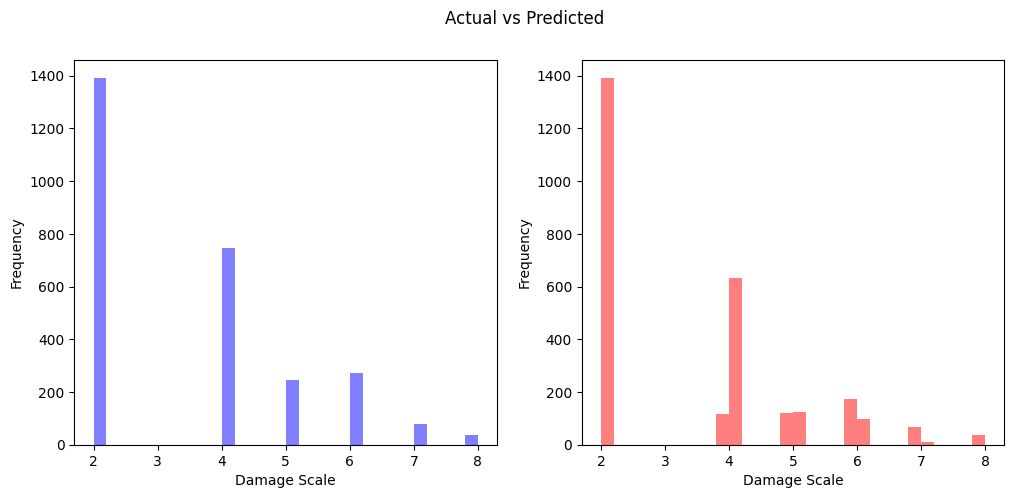

In [4]:
# 모델 예측값과 y 레이블의 정답값 분포 시각화
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 예측값과 실제값의 분포 시각화
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Actual vs Predicted')

# y_test 히스토그램
axs[0].hist(y_test, bins=30, alpha=0.5, color='blue', label='Actual')
axs[0].set_xlabel('Damage Scale')
axs[0].set_ylabel('Frequency')

# lr_pred, ridge_pred, lasso_pred, enet_pred, dt_pred, rf_pred
# y_pred_lgb 히스토그램
axs[1].hist(lr_pred, bins=30, alpha=0.5, color='red', label='Predicted')
axs[1].set_xlabel('Damage Scale')
axs[1].set_ylabel('Frequency')

plt.show()



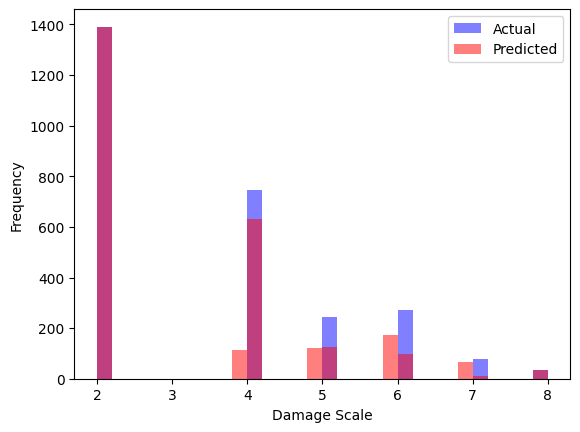

In [5]:
fig, ax = plt.subplots()
ax.hist(y_test, bins=30, alpha=0.5, color='blue', label='Actual')
ax.hist(lr_pred, bins=30, alpha=0.5, color='red', label='Predicted')
ax.set_xlabel('Damage Scale')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

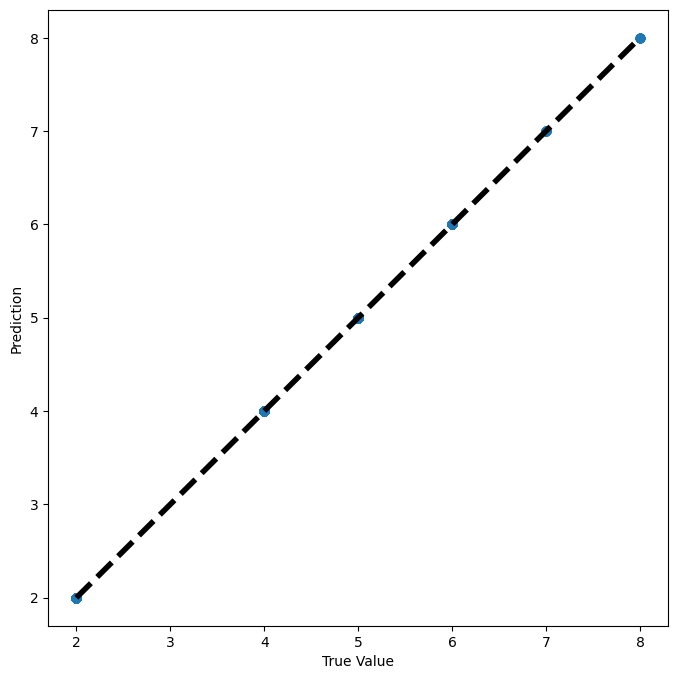

In [6]:
import matplotlib.pyplot as plt

predictions = lr_pred

# 예측값과 실제값 비교
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [predictions.min(), predictions.max()], 'k--', lw=4)
plt.xlabel('True Value')
plt.ylabel('Prediction')
plt.show()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

predictions = dt_pred

# y_test: 실제 값, prediction: 예측 값
accuracy = np.sum(np.abs(y_test['피해규모'].values - predictions) <= 0.1) / len(y_test)

print("Accuracy: {:.2f}%".format(accuracy * 100))

KeyError: '피해규모'